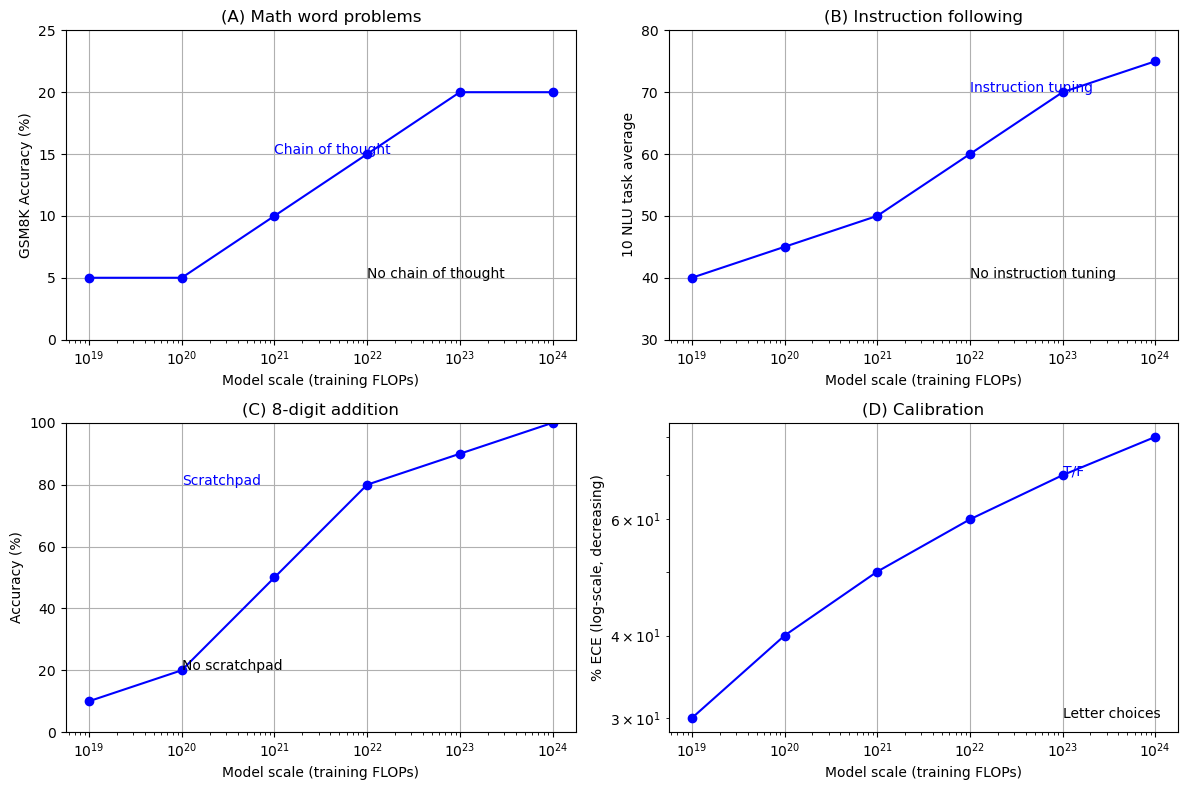

In [1]:
import matplotlib.pyplot as plt  
import numpy as np  

# 数据  
model_scale = [10**19, 10**20, 10**21, 10**22, 10**23, 10**24]  
accuracy_math = [5, 5, 10, 15, 20, 20]  
accuracy_instruction = [40, 45, 50, 60, 70, 75]  
accuracy_addition = [10, 20, 50, 80, 90, 100]  
ece_calibration = [30, 40, 50, 60, 70, 80]  

# 创建子图  
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  

# 子图 A  
axs[0, 0].plot(model_scale, accuracy_math, marker='o', color='blue', label='Chain of thought')  
axs[0, 0].set_xscale('log')  
axs[0, 0].set_ylim(0, 25)  
axs[0, 0].set_ylabel('GSM8K Accuracy (%)')  
axs[0, 0].set_title('(A) Math word problems')  
axs[0, 0].text(10**21, 15, 'Chain of thought', fontsize=10, color='blue')  
axs[0, 0].text(10**22, 5, 'No chain of thought', fontsize=10, color='black')  

# 子图 B  
axs[0, 1].plot(model_scale, accuracy_instruction, marker='o', color='blue', label='Instruction tuning')  
axs[0, 1].set_xscale('log')  
axs[0, 1].set_ylim(30, 80)  
axs[0, 1].set_ylabel('10 NLU task average')  
axs[0, 1].set_title('(B) Instruction following')  
axs[0, 1].text(10**22, 70, 'Instruction tuning', fontsize=10, color='blue')  
axs[0, 1].text(10**22, 40, 'No instruction tuning', fontsize=10, color='black')  

# 子图 C  
axs[1, 0].plot(model_scale, accuracy_addition, marker='o', color='blue', label='Scratchpad')  
axs[1, 0].set_xscale('log')  
axs[1, 0].set_ylim(0, 100)  
axs[1, 0].set_ylabel('Accuracy (%)')  
axs[1, 0].set_title('(C) 8-digit addition')  
axs[1, 0].text(10**20, 80, 'Scratchpad', fontsize=10, color='blue')  
axs[1, 0].text(10**20, 20, 'No scratchpad', fontsize=10, color='black')  

# 子图 D  
axs[1, 1].plot(model_scale, ece_calibration, marker='o', color='blue', label='T/F')  
axs[1, 1].set_xscale('log')  
axs[1, 1].set_yscale('log')  
axs[1, 1].set_ylabel('% ECE (log-scale, decreasing)')  
axs[1, 1].set_title('(D) Calibration')  
axs[1, 1].text(10**23, 70, 'T/F', fontsize=10, color='blue')  
axs[1, 1].text(10**23, 30, 'Letter choices', fontsize=10, color='black')  

# 设置x轴标签  
for ax in axs.flat:  
    ax.set_xlabel('Model scale (training FLOPs)')  
    ax.grid(True)  

plt.tight_layout()  
plt.show()

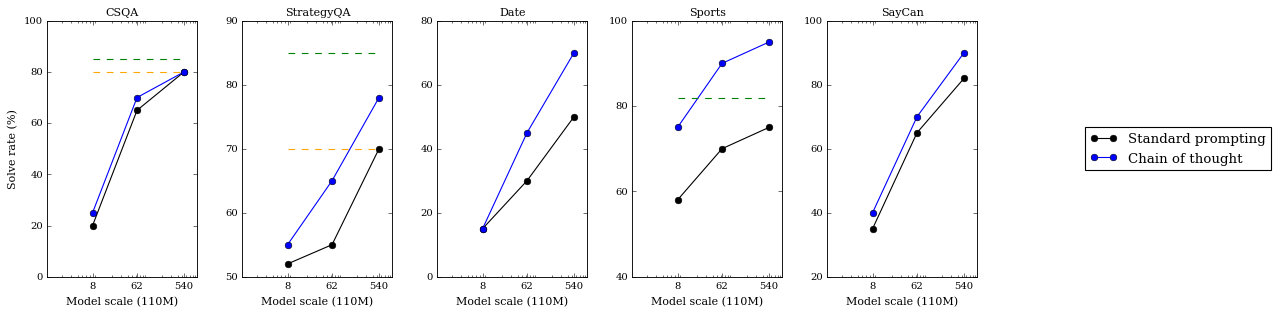

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'serif'  # 使用 serif 字体族  
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman']  
plt.rcParams['mathtext.fontset'] = 'dejavuserif'  
# Data
x_values = [8, 62, 540]
datasets = {
    'CSQA': {
        'standard': [20, 65, 80],
        'chain': [25, 70, 80],
        'prior': [80, 80, 80],
        'human': [85, 85, 85]
    },
    'StrategyQA': {
        'standard': [52, 55, 70],
        'chain': [55, 65, 78],
        'prior': [70, 70, 70],
        'human': [85, 85, 85]
    },
    'Date': {
        'standard': [15, 30, 50],
        'chain': [15, 45, 70],
        'prior': None,
        'human': None
    },
    'Sports': {
        'standard': [58, 70, 75],
        'chain': [75, 90, 95],
        'prior': None,
        'human': [82, 82, 82]
    },
    'SayCan': {
        'standard': [35, 65, 82],
        'chain': [40, 70, 90],
        'prior': None,
        'human': None
    }
}

# Create figure and subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

# Plot settings
line_styles = {
    'standard': {'color': 'black', 'marker': 'o', 'linestyle': '-', 'label': 'Standard prompting'},
    'chain': {'color': 'blue', 'marker': 'o', 'linestyle': '-', 'label': 'Chain of thought'},
    'prior': {'color': 'orange', 'linestyle': '--', 'label': 'Prior supervised best'},
    'human': {'color': 'green', 'linestyle': '--', 'label': 'Human'}
}

# Plot each subplot
for idx, (dataset, data) in enumerate(datasets.items()):
    ax = axs[idx]
    
    # Plot lines
    for key, style in line_styles.items():
        if data[key] is not None:
            ax.plot(x_values, data[key], **style)
    
    # Set labels and title
    ax.set_title(dataset)
    if idx == 0:
        ax.set_ylabel('Solve rate (%)')
    ax.set_xlabel('Model scale (110M)')
    
    # Set x-axis scale and ticks
    ax.set_xscale('log')
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values)
    
    # Set y-axis limits based on data
    if dataset == 'CSQA':
        ax.set_ylim(0, 100)
        ax.set_yticks(range(0, 101, 20))
    elif dataset == 'StrategyQA':
        ax.set_ylim(50, 90)
        ax.set_yticks(range(50, 91, 10))
    elif dataset == 'Date':
        ax.set_ylim(0, 80)
        ax.set_yticks(range(0, 81, 20))
    elif dataset == 'Sports':
        ax.set_ylim(40, 100)
        ax.set_yticks(range(40, 101, 20))
    elif dataset == 'SayCan':
        ax.set_ylim(20, 100)
        ax.set_yticks(range(20, 101, 20))

# Add legend to the rightmost subplot
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.show()

In [ ]:
plt.style.available

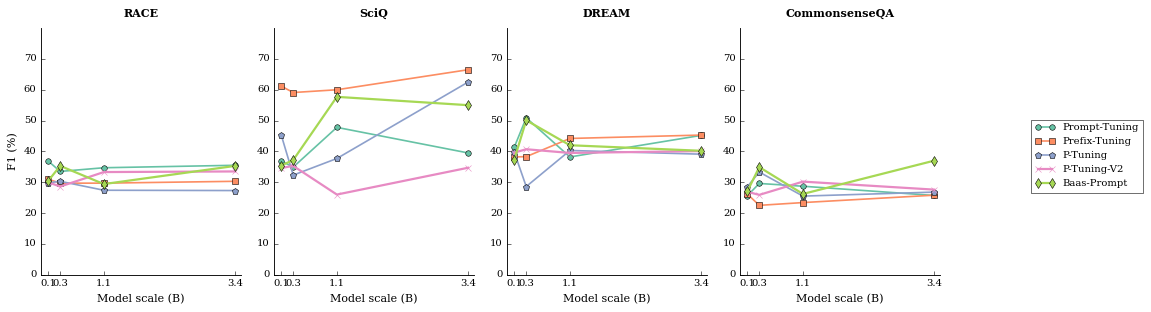

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style for publication quality
plt.style.use('classic')
plt.rcParams['font.family'] = 'serif'  # 使用 serif 字体族  
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman']  
plt.rcParams['mathtext.fontset'] = 'dejavuserif'  

plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

plt.rcParams['axes.facecolor'] = 'white'  # 设置白色背景  
plt.rcParams['figure.facecolor'] = 'white'  

# 全部使用F1
# Data
x_values = [0.124, 0.335, 1.1, 3.4]
datasets = {
    'RACE': {
        'Prompt-Tuning': [36.9, 33.5, 34.7, 35.5],
        'Prefix-Tuning': [31.0, 29.7, 29.7, 30.3],
        'P-Tuning': [29.8, 30.3, 27.4, 27.3],
        'P-Tuning-V2': [30.0, 28.6, 33.3, 33.5],
        'Baas-Prompt': [30.4, 35.3, 29.4, 35.3]
    },
    'SciQ': {
        'Prompt-Tuning': [36.9, 34.9, 47.8, 39.5],
        'Prefix-Tuning': [61.2, 59.1, 60.0, 66.5],
        'P-Tuning': [45.4, 32.3, 37.7, 62.5],
        'P-Tuning-V2': [34.6, 35.3, 26.0, 34.7],
        'Baas-Prompt': [35.4, 37.2, 57.7, 55.0]
    },
    'DREAM': {
        'Prompt-Tuning': [41.3, 50.9, 38.2, 45.2],
        'Prefix-Tuning': [38.2, 38.3, 44.2, 45.3],
        'P-Tuning': [39.8, 28.6, 40.3, 39.1],
        'P-Tuning-V2': [39.6, 40.7, 39.5, 40.1],
        'Baas-Prompt': [37.3, 50.1, 42.0, 40.2]
    },
    'CommonsenseQA': {
        'Prompt-Tuning': [25.6, 29.6, 28.7, 25.7],
        'Prefix-Tuning': [26.2, 22.5, 23.4, 25.8],
        'P-Tuning': [28.5, 33.3, 25.5, 26.8],
        'P-Tuning-V2': [26.9, 25.9, 30.2, 27.6],
        'Baas-Prompt': [27.0, 34.9, 26.2, 37.0]
    },
}

# Create figure and subplots with better proportions
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
plt.subplots_adjust(wspace=0.5, bottom=0.2)

# Use a professional color palette
colors = sns.color_palette('Set2')
line_styles = {
    'Prompt-Tuning': {'color': colors[0], 'marker': 'o', 'linestyle': '-', 'label': 'Prompt-Tuning', 'markersize': 5, 'linewidth': 1.5},
    'Prefix-Tuning': {'color': colors[1], 'marker': 's', 'linestyle': '-', 'label': 'Prefix-Tuning', 'markersize': 5, 'linewidth': 1.5},
    'P-Tuning': {'color': colors[2], 'marker': 'p', 'linestyle': '-', 'label': 'P-Tuning', 'linewidth': 1.5},
    'P-Tuning-V2': {'color': colors[3], 'marker': 'x','linestyle': '-', 'label': 'P-Tuning-V2', 'linewidth': 2},
    'Baas-Prompt': {'color': colors[4], 'marker': 'd','linestyle': '-', 'label': 'Baas-Prompt', 'linewidth': 2}
}

# Plot each subplot
for idx, (dataset, data) in enumerate(datasets.items()):
    ax = axs[idx]
    
    # Plot lines
    for key, style in line_styles.items():
        if data[key] is not None:
            ax.plot(x_values, data[key], **style)
    
    # Set labels and title
    ax.set_title(dataset, pad=10, fontweight='bold')
    if idx == 0:
        ax.set_ylabel('F1 (%)')
    ax.set_xlabel('Model scale (B)')
    
    # Set x-axis scale and ticks
    ax.set_xscale('linear') # log
    ax.set_xticks(x_values)
    ax.set_xticklabels(['0.1','0.3','1.1','3.4'])
    # Remove minor ticks  
    ax.minorticks_off()  
    # Add subplot label
    # ax.text(-0.2, 1.05, f'({chr(97+idx)})', transform=ax.transAxes, fontweight='bold')
    
    # Set y-axis limits based on data
    if dataset == 'RACE':
        ax.set_ylim(0, 80)
        ax.set_yticks(range(0, 80, 10)) # 设置纵轴的刻度为从 0 开始，每次增加 20，直到 100
    elif dataset == 'SciQ':
        ax.set_ylim(0, 80)
        ax.set_yticks(range(0, 80, 10))
    elif dataset == 'DREAM':
        ax.set_ylim(0, 80)
        ax.set_yticks(range(0, 80, 10))
    elif dataset == 'CommonsenseQA':
        ax.set_ylim(0, 80)
        ax.set_yticks(range(0, 80, 10))
        
    # elif dataset == 'SayCan':
    #     ax.set_ylim(20, 100)
    #     ax.set_yticks(range(20, 101, 20))

    # Add spines
    ax.tick_params(top=False, right=False)  
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)

# Add legend with better positioning and style
handles, labels = axs[-1].get_legend_handles_labels() # 从最后一个轴对象 axs[-1] 获取图例的句柄和标签。
legend = fig.legend(handles, labels, 
                   loc='center right', 
                   bbox_to_anchor=(1.2, 0.5),
                   fontsize=9,
                   frameon=True,
                   edgecolor='black',
                   fancybox=False)
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_facecolor('white') 

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save with high DPI for publication quality
plt.savefig('performance_across_scales.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()